<a href="https://colab.research.google.com/github/huaiyi66/Jty/blob/main/notebooks/A02_SatCLIP_Hugging_Face_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A02 - Simple usage of pretrained SatCLIP embeddings using Hugging Face

To obtained pretrained **SatCLIP** embeddings, first install the repository.

In [1]:
!rm -r sample_data .config # Empty current directory
!git clone https://github.com/microsoft/satclip.git . # Clone SatCLIP repository

Cloning into '.'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 264 (delta 51), reused 48 (delta 48), pack-reused 206 (from 1)
Receiving objects: 100% (264/264), 30.76 MiB | 20.59 MiB/s, done.
Resolving deltas: 100% (110/110), done.


Now install the required Python packages.

In [2]:
!pip install lightning --quiet
!pip install rasterio --quiet
!pip install torchgeo --quiet
!pip install cartopy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Load required packages.

In [3]:
import sys
sys.path.append('/content/satclip')

import torch
from load import get_satclip

Pretrained SatCLIP models are hosted on Hugging Face, where we can easily access them. Here, for example, we use the $L=40$ version with a ResNet18 backbone.

In [4]:
from huggingface_hub import hf_hub_download
from load import get_satclip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

c = torch.randn(32, 2)  # Represents a batch of 32 locations (lon/lat)

model = get_satclip(
    hf_hub_download("microsoft/SatCLIP-ResNet18-L40", "satclip-resnet18-l40.ckpt"),
    device=device,
)  # Only loads location encoder by default
model.eval()
with torch.no_grad():
    emb = model(c.double().to(device)).detach().cpu()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


satclip-resnet18-l40.ckpt:   0%|          | 0.00/75.6M [00:00<?, ?B/s]

using pretrained moco resnet18


Downloading: "https://hf.co/torchgeo/resnet18_sentinel2_all_moco/resolve/5b8cddc9a14f3844350b7f40b85bcd32aed75918/resnet18_sentinel2_all_moco-59bfdff9.pth" to /root/.cache/torch/hub/checkpoints/resnet18_sentinel2_all_moco-59bfdff9.pth
100%|██████████| 42.8M/42.8M [00:00<00:00, 79.2MB/s]


In [5]:
emb.shape

torch.Size([32, 256])

In [6]:
emb

tensor([[ 2.7112,  1.5077,  0.7876,  ..., -0.3192, -0.7528, -1.7444],
        [ 2.6515,  2.1392,  2.6308,  ..., -0.4565, -1.2611, -1.5178],
        [ 3.1145,  1.4563, -0.2603,  ..., -0.1382, -1.1730, -1.4838],
        ...,
        [ 2.8578,  1.5718,  0.3935,  ..., -0.1377, -0.9424, -1.5660],
        [ 2.7761,  1.5404,  0.5906,  ..., -0.2133, -0.7955, -1.6363],
        [ 2.7896,  1.4721,  0.3293,  ..., -0.1559, -0.6730, -1.5958]],
       dtype=torch.float64)

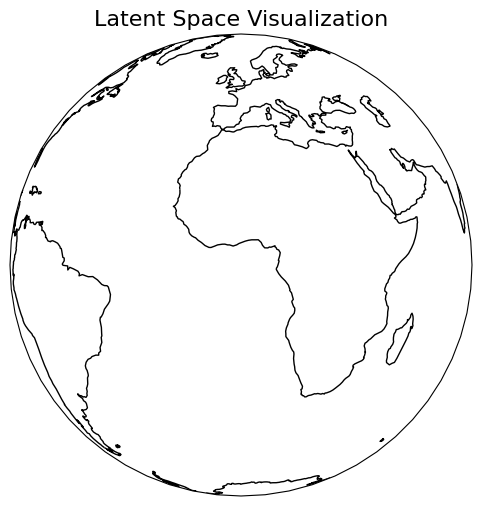

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# 创建一个图形
fig = plt.figure(figsize=(8, 6))

# 创建一个地图轴（使用 Orthographic 投影）
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=0))

# 绘制海岸线和国家边界
ax.coastlines(resolution='110m')  # '110m' 表示较低分辨率，可以选择 '10m'（高分辨率）或 '50m'（中分辨率）
# ax.add_feature(cartopy.feature.BORDERS)  # 添加国家边界

# 绘制网格线
# ax.gridlines(draw_labels=True, dashes=[2, 2], linewidth=1)

# 绘制纬度和经度的线
# ax.set_xticks(np.arange(-180, 180, 60), )
# ax.set_yticks(np.arange(-90, 90, 30), )

# 显示标题
plt.title("Latent Space Visualization", fontsize=16)

# 显示图形
plt.show()


In [52]:
# from load import get_satclip
from huggingface_hub import hf_hub_download
import torch
from sklearn.metrics.pairwise import cosine_similarity
import rasterio
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from math import radians, sin, cos, acos
import pandas as pd


def get_example_image(path, plot=True):
    """
    Loads example Sentinel-2 image from path to tif file
    :param path: Path to image file
    :param plot: If True, will plot an RGB image of the satellite image
    :return: Normalized image as torch tensor
    """
    with rasterio.open(path) as f:
            data = f.read().astype(np.float32)
            image = data / 10000.0
            B10 = np.zeros((1, *image.shape[1:]), dtype=image.dtype)
            image = np.concatenate([image[:10], B10, image[10:]], axis=0)
            image = torch.tensor(image)

            if plot:
                    # Read the first three RGB bands (assuming they are bands 4, 3, and 2)
                    red_band = f.read(4) / 10000.0
                    green_band = f.read(3) / 10000.0
                    blue_band = f.read(2) / 10000.0

                    # Stack the bands to create an RGB image
                    rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

                    # Plot the RGB image
                    plt.imshow(rgb_image)
                    plt.title("RGB Sentinel-2 Image")
                    plt.axis('off')  # Hide axes
                    plt.show()

    return image

def generate_control_locations(n):
    """
    Generates n regularly distributed locations on the planet
    :param n: Number of locations to generate
    :return: longitudes, latitudes of generated locations
    """
    import math
    n = n // 2
    # golden ratio
    phi = (1 + math.sqrt(5)) / 2

    lats, lons = [], []

    for i in np.arange(-n, n):
        lat = np.arcsin( (2*i) / (2*n + 1) ) * 180 / np.pi
        lon = (i % phi) * (360 / phi)

        if lon < -180:
            lon += 360
        if lon > 180:
            lon -= 360

        lons.append(lon)
        lats.append(lat)

    return np.stack(lons), np.stack(lats)

def arc_distance(lon1, lat1, lon2, lat2):
    """
    Calculates the great-circle distance between two points on Earth.
    :param lat1: Latitude of location 1 (in degrees)
    :param lon1: Longitude of location 1 (in degrees)
    :param lat2: Latitude of location 2 (in degrees)
    :param lon2: Longitude of location 2 (in degrees)
    :return: Distance in kilometers
    """
    mlat = radians(lat1)
    mlon = radians(lon1)
    plat = radians(lat2)
    plon = radians(lon2)

    dist = 6371.01 * acos(sin(mlat) * sin(plat) + cos(mlat) * cos(plat) * cos(mlon - plon))
    return dist

from cartopy.io import shapereader
from shapely.geometry import Point, shape

def is_land_point(lon, lat, land_shapes):
    point = Point(lon, lat)
    for land_shape in land_shapes:
        if land_shape.contains(point):
            return True
    return False

def generate_land_control_locations(n):
    """
    Generate ~n control points that lie only on land
    Returns:
        control_lons: ndarray of longitudes
        control_lats: ndarray of latitudes
    """
    import math
    from tqdm import tqdm

    # Load land geometry from Natural Earth
    shpfilename = shapereader.natural_earth(resolution='110m',
                                            category='physical',
                                            name='land')
    reader = shapereader.Reader(shpfilename)
    land_shapes = list(reader.geometries())

    # Fibonacci point sampling
    n = n // 2
    phi = (1 + math.sqrt(5)) / 2

    lons, lats = [], []

    for i in tqdm(np.arange(-n, n)):
        lat = np.arcsin((2 * i) / (2 * n + 1)) * 180 / np.pi
        lon = (i % phi) * (360 / phi)
        lon = (lon + 180) % 360 - 180  # wrap to [-180, 180]

        if is_land_point(lon, lat, land_shapes):
            lons.append(lon)
            lats.append(lat)

    return np.array(lons), np.array(lats)



In [60]:
#Generate control locations
control_lons, control_lats = generate_control_locations(100000)
# control_lons, control_lats = generate_land_control_locations(100000)
locs = torch.tensor(np.stack([control_lons, control_lats], axis=1)).to(device)

model = get_satclip(
    hf_hub_download("microsoft/SatCLIP-ResNet50-L40", "satclip-resnet50-l40.ckpt"),
    return_all=True,
    device=device,
)
model.eval()
#Get location embeddings of control locations
with torch.no_grad():
  control_embs = model.encode_location(locs)

using pretrained moco resnet50


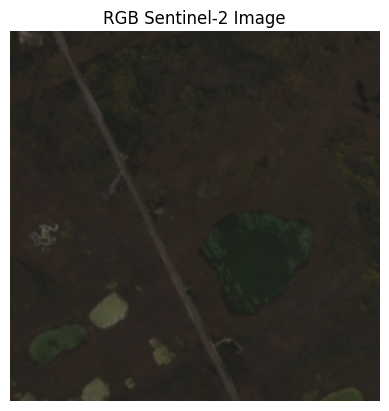

In [61]:
# locations = pd.read_csv('https://satclip.z13.web.core.windows.net/satclip/index.csv')
#Path to example images
paths = ['https://github.com/microsoft/satclip/raw/main/figures/example_s2/patch_445.tif',
         'https://github.com/microsoft/satclip/raw/main/figures/example_s2/patch_8845.tif',
         'https://github.com/microsoft/satclip/raw/main/figures/example_s2/patch_33188.tif'
         ]
#Chose one!
path = paths[1]
image = get_example_image(path, plot=True)

In [45]:
img_emb = model.visual(image.unsqueeze(0).to(device))

#Find row in control_embs that is closest to loc_emb by cosine similarity
cosine_sim = cosine_similarity(img_emb.cpu().detach().numpy(), control_embs.cpu().detach().numpy())
#Get index of control location corresponding to embedding with highest cosine similarity to image embedding
closest = np.argmax(cosine_sim)
control_lons[closest], control_lats[closest]

(np.float64(-117.81386537176385), np.float64(62.01508538951437))

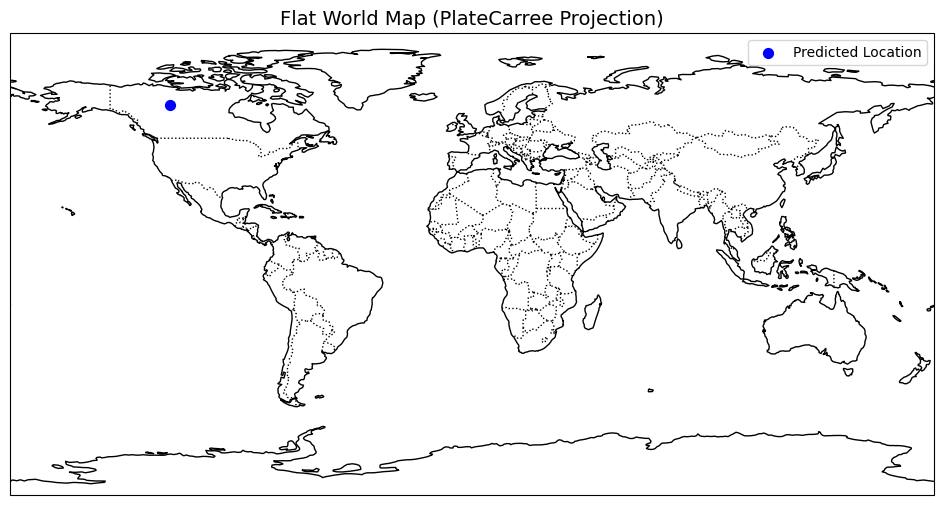

In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 创建一个图形，使用 PlateCarree 投影（平面等距经纬度）
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 添加地图特征
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAND, facecolor='lightgray')
# ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# 设置经纬度网格
# ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
# ax.gridlines(draw_labels=True, linestyle='--')

# 设置显示范围（可选）
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

ax.scatter(control_lons[closest], control_lats[closest], s=50, c="blue", label="Predicted Location", transform=ccrs.PlateCarree())
ax.legend()

plt.title("Flat World Map (PlateCarree Projection)", fontsize=14)
plt.show()


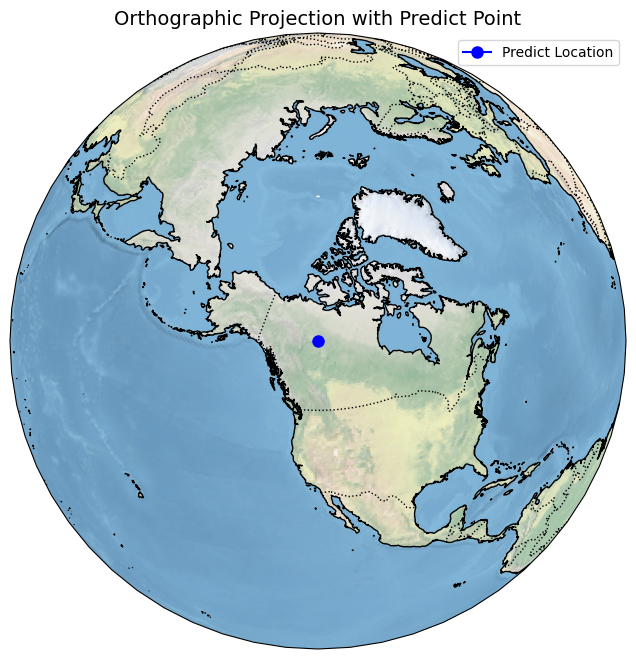

In [63]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 给定的点坐标
lon = control_lons[closest]
lat = control_lats[closest]

# 创建正射投影图形，中心设为该点
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))

# ✅ 加载背景地球图像（确保地图不为空）
ax.stock_img()  # 使用内置图像背景

# ✅ 添加海岸线和边界
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# ✅ 绘制蓝色点
ax.plot(lon, lat, marker='o', color='blue', markersize=8,
        transform=ccrs.PlateCarree(), label='Predict Location')

# 图例 & 标题
plt.title("Orthographic Projection with Predict Point", fontsize=14)
ax.legend()
plt.show()


In [65]:
#Generate control locations
control_lons, control_lats = generate_land_control_locations(500000)
locs = torch.tensor(np.stack([control_lons, control_lats], axis=1)).to(device)

model = get_satclip(
    hf_hub_download("microsoft/SatCLIP-ResNet50-L40", "satclip-resnet50-l40.ckpt"),
    return_all=True,
    device=device,
)
model.eval()
#Get location embeddings of control locations
with torch.no_grad():
  control_embs = model.encode_location(locs)

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sklearn.decomposition import PCA
import torch

# Step 1: 获取嵌入并降维到3D (用于RGB)
control_embs_np = control_embs.cpu().detach().numpy()  # shape [N, D]
print(control_embs_np.shape)
pca = PCA(n_components=3)
control_embs_np_rgb = pca.fit_transform(control_embs_np)  # shape [N, 3]

# Step 2: 标准化到 [0, 1] 区间作为RGB颜色
def normalize(x):
    x = x - x.min(axis=0)
    x = x / (x.max(axis=0) + 1e-5)
    return x

colors = normalize(control_embs_np_rgb)  # shape [N, 3]


100%|██████████| 500000/500000 [12:09<00:00, 685.62it/s]


using pretrained moco resnet50


(144354, 256)


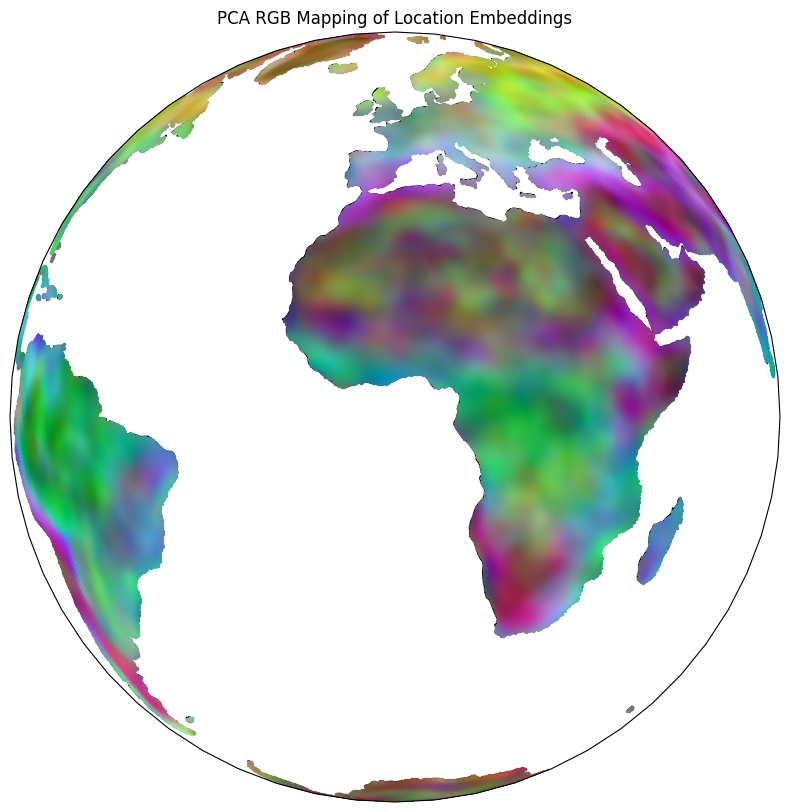

In [67]:
# lon = -117.81386537176385
# lat = 62.01508538951437

lon = 0
lat = 0

# Step 3: 使用 Cartopy 绘图（球形地图）
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
# ax.stock_img()

# ✅ 使用黑白填充陆地和海洋
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

ax.coastlines()
ax.set_global()

# Step 4: 绘制每个控制点并使用 RGB 颜色
for lon, lat, color in zip(control_lons, control_lats, colors):
    ax.plot(lon, lat, marker='o', markersize=1.5, color=color, transform=ccrs.PlateCarree())

plt.title("PCA RGB Mapping of Location Embeddings")
plt.show()


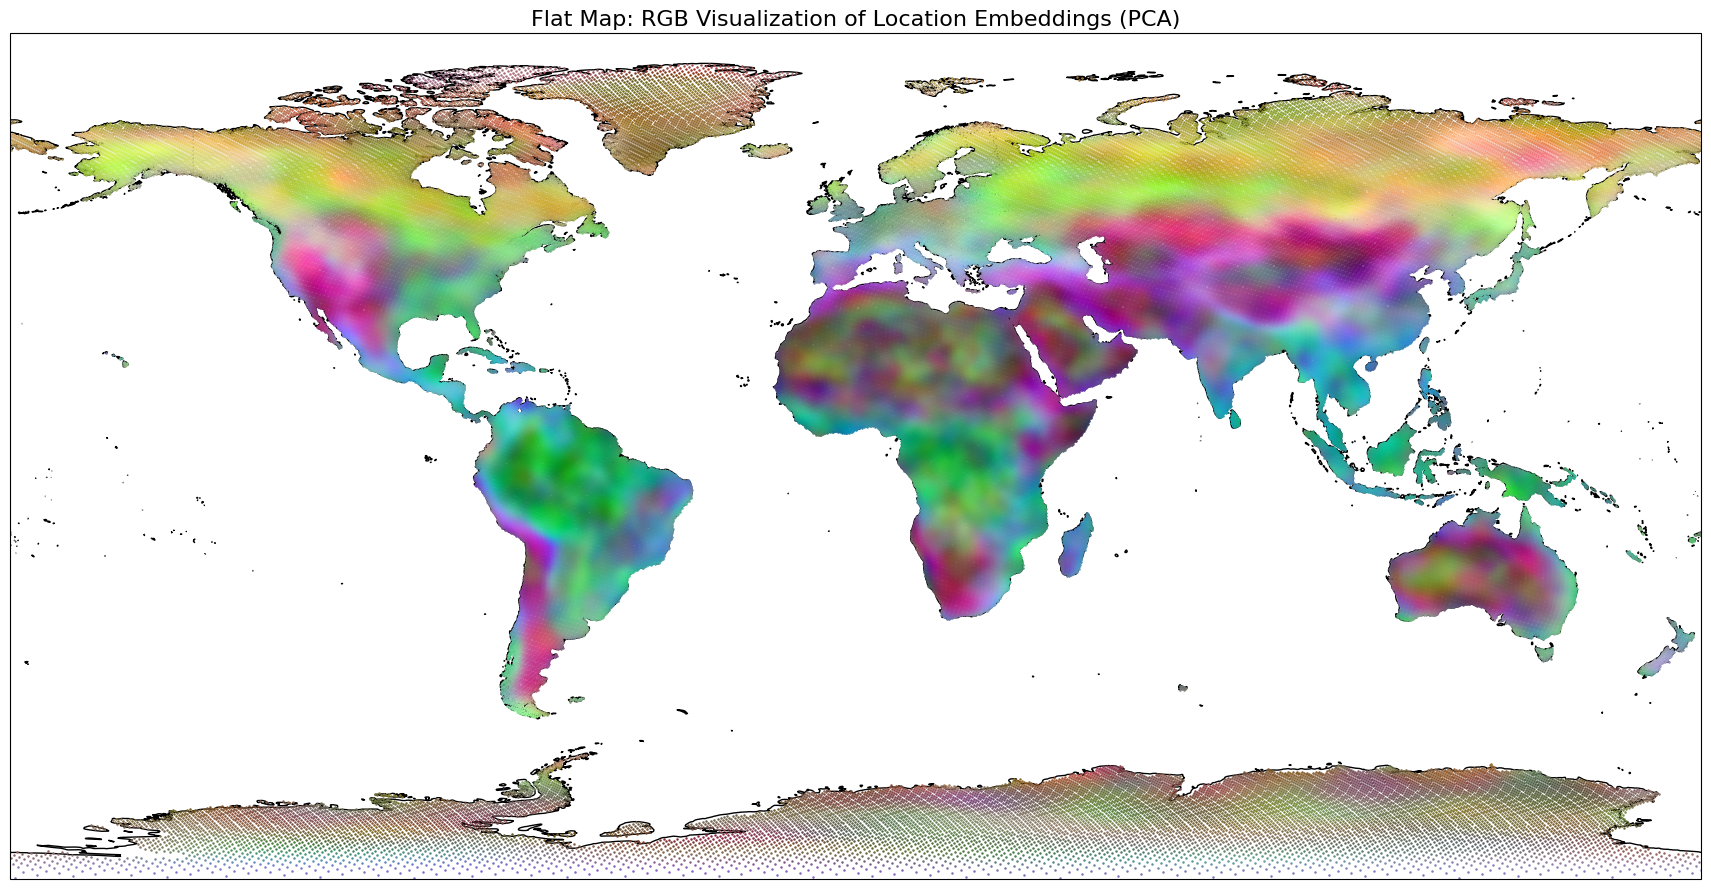

In [68]:
# ✅ 使用 PlateCarree（平面投影）
fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# 黑白风格地图背景
# ax.add_feature(cfeature.LAND, facecolor='lightgray')
# ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.coastlines(resolution='50m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# 绘制 RGB 点
for lon, lat, color in zip(control_lons, control_lats, colors):
    ax.plot(lon, lat, marker='o', markersize=0.8, color=color, transform=ccrs.PlateCarree())

plt.title("Flat Map: RGB Visualization of Location Embeddings (PCA)", fontsize=16)
plt.tight_layout()
plt.show()